In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
data = pd.read_csv('heart.csv')
print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [8]:
# Convert non-numeric data to numeric data
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['cp'] = le.fit_transform(data['cp'])
data['fbs'] = le.fit_transform(data['fbs'])
data['restecg'] = le.fit_transform(data['restecg'])
data['exang'] = le.fit_transform(data['exang'])
data['slope'] = le.fit_transform(data['slope'])
data['thal'] = le.fit_transform(data['thal'])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

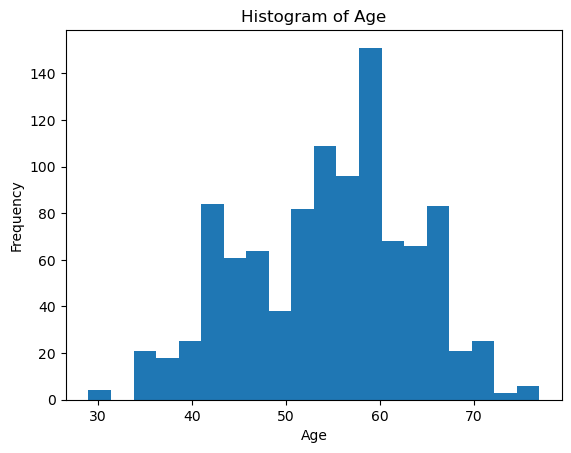

In [14]:
# Histogram of Age
plt.hist(data['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

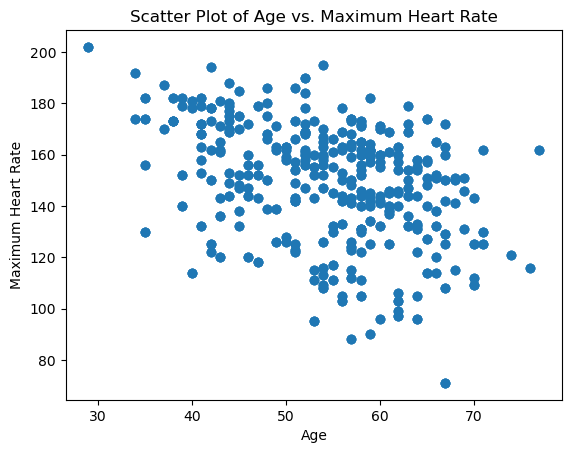

In [16]:
# Scatter Plot of Age vs. Maximum Heart Rate
plt.scatter(data['age'], data['thalach'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Scatter Plot of Age vs. Maximum Heart Rate')
plt.show()

In [23]:
# Get the female and male counts
female_count = data[data['sex'] == 0].shape[0]  # Count rows where sex is 0 (female)
male_count = data[data['sex'] == 1].shape[0]   # Count rows where sex is 1 (male)

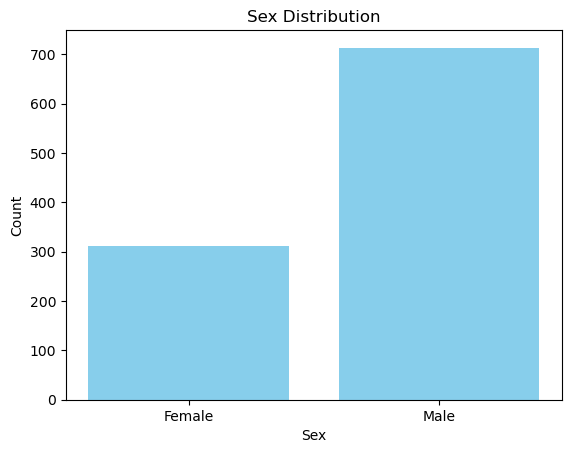

In [27]:
# Create the bar chart
sex_labels = ['Female', 'Male']  # Explicit labels for clarity
plt.bar(sex_labels, [female_count, male_count], color='blue')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Distribution')
plt.show()

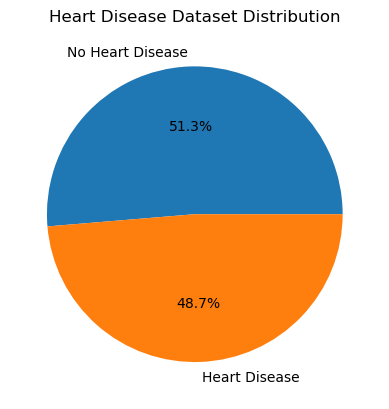

In [26]:
plt.pie(data['target'].value_counts(), labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%')
plt.title('Heart Disease Dataset Distribution')
plt.show()

In [28]:
X=data.drop(['target'], axis =1)
y=data['target']

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#Importing the basic librarires for building model - classification

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

In [32]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [39]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error (Linear Regression):", mse)

Mean Squared Error (Linear Regression): 0.14759448520056748


In [37]:
r2 = r2_score(y_test, y_pred_linear)
print("R-squared (Linear Regression):", r2)

R-squared (Linear Regression): 0.40960801060785734


In [47]:
li = [LinearRegression(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]
d = {}
for i in li:
    i.fit(X_train, y_train)
    if isinstance(i, LinearRegression):              # add Linear Regression ML method
        ypred = i.predict(X_test)
        r2 = r2_score(y_test, ypred) * 100
        print(f"Linear Regression: {round(r2, 2)}%")
        d.update({str(i): round(r2, 2)})
        
    elif isinstance(i, LogisticRegression):         # add Logistic Regression ML method 
        ypred = i.predict(X_test)
        acc = accuracy_score(y_test, ypred) * 100
        print(f"Logistic Regression: {round(acc, 2)}%")
        d.update({str(i): round(acc, 2)})
        
    elif isinstance(i, DecisionTreeClassifier):     # Decision Tree Classifier, from the original code
        ypred = i.predict(X_test)
        acc = accuracy_score(y_test, ypred) * 100
        print(f"Decision Tree Classifier: {round(acc, 2)}%")
        d.update({str(i): round(acc, 2)})
        
    elif isinstance(i, RandomForestClassifier):     # add Random Forest Classifier ML method 
        ypred = i.predict(X_test)
        acc = accuracy_score(y_test, ypred) * 100
        print(f"Random Forest Classifier: {round(acc, 2)}%")
        d.update({str(i): round(acc, 2)})

Linear Regression: 40.96%
Logistic Regression: 78.54%
Decision Tree Classifier: 98.54%


C:\Users\LENOVO\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Classifier: 98.54%


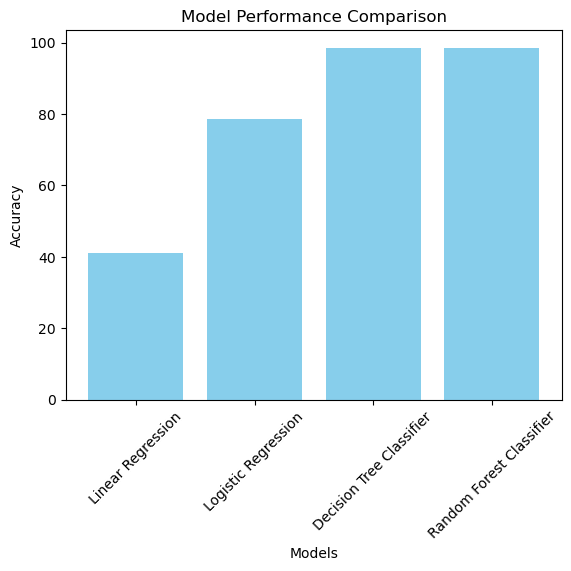

In [46]:
# Data
models = ['Linear Regression','Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']
accuracies = [40.96, 78.54, 98.54, 98.54 ]

# Create a bar plot
plt.bar(models, accuracies, color='skyblue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()